In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked','who','deck']]
adult = df[df.who.isin(['man','woman'])]
df.age.fillna(adult.age.mean().round(1), inplace=True)
df.embarked.fillna('S', inplace=True)
df.drop(columns=['deck','who'], inplace=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df.embarked = le.fit_transform(df.embarked)

In [4]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values 

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_std)

pca4 = PCA(n_components=4)
X_pca4 = pca4.fit_transform(X_std)

pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(X_std)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2023
)
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7821229050279329

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca2, y, stratify=y, test_size=0.2, random_state=2023
)
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7430167597765364

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca4, y, stratify=y, test_size=0.2, random_state=2023
)
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7541899441340782

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca6, y, stratify=y, test_size=0.2, random_state=2023
)
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7653631284916201

In [13]:
df1 = pd.DataFrame(X_pca2, columns=['PC1','PC2'])
df1['survived'] = df.survived
df1.head()

,PC1,PC2,survived
0,-1.260268,0.656886,0
1,2.283525,-1.106072,1
2,-0.678950,0.425341,1
3,1.349088,-0.459511,1
4,-1.375322,-0.323265,0


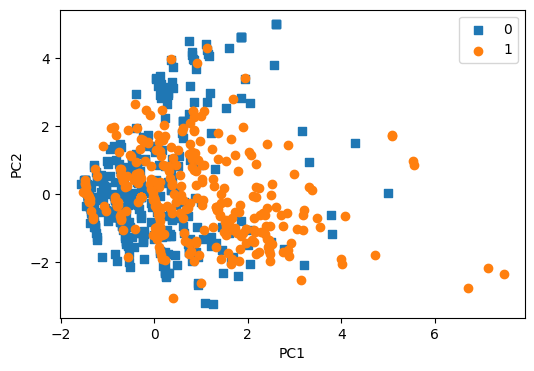

In [14]:
markers = ['s','o']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = df1[df1.survived == i]['PC1']
    y_data = df1[df1.survived == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=df1.survived[i])
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.show()

In [15]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2023
    )
    rfc = RandomForestClassifier(random_state=2023)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [16]:
for n in [2, 4, 6]:
    pca = PCA(n_components=n)
    wine_pca = pca.fit_transform(X_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(wine_pca, y)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{acc:.4f}')

PCA2: 설명력-0.5095, 정확도-0.7430
PCA4: 설명력-0.7689, 정확도-0.7542
PCA6: 설명력-0.9472, 정확도-0.7654
